# MPI validation
Comparison between MPI climate model and ORAS5

## Imports

In [1]:
import warnings
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import xarray as xr
from climpred import HindcastEnsemble
from dateutil.relativedelta import *
from matplotlib.ticker import AutoMinorLocator
import warnings
import tqdm
import pathlib
import cmocean

# Import custom modules
from src.XRO import XRO, xcorr

## set plotting specs
sns.set(rc={"axes.facecolor": "white", "axes.grid": False})

## bump up DPI
mpl.rcParams["figure.dpi"] = 100

## Load data

In [2]:
## MPI data
mpi_load_fp = pathlib.Path("/Users/theo/research/enso2025_xro/data/mpi_Th/Th.nc")
Th_mpi = xr.open_dataset(mpi_load_fp)

## ORAS5 reanalysis (use as benchmark)
oras_load_fp = pathlib.Path("../data/XRO_indices_oras5.nc")
Th_oras = xr.open_dataset(oras_load_fp)

## rename variables for consistency and trim so time periods covered are the same
Th_mpi = Th_mpi.sel(time=slice("1979", "2024"))
Th_oras = Th_oras[["Nino34", "WWV"]].rename({"Nino34": "T_34", "WWV": "h"})

## Diagnostics

### Seasonal synchronization

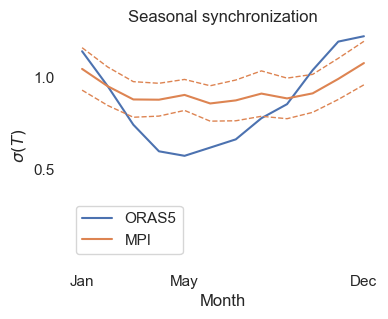

In [3]:
## func to compute std dev as a function of month
get_std = lambda x: x.groupby("time.month").std("time")

## compute std for each dataset
oras_std = get_std(Th_oras["T_34"])
mpi_std_mean = get_std(Th_mpi["T_34"]).mean("member")
mpi_std_std = get_std(Th_mpi["T_34"]).std("member")

## months (x-coordinate for plotting
months = np.arange(1, 13)

### Set up plot
fig, ax = plt.subplots(figsize=(4, 3))

## plot for ORAS5
oras_plot = ax.plot(months, oras_std, label="ORAS5")

## plot MPI ensemble mean
mpi_plot = ax.plot(months, mpi_std_mean, label="MPI")

## plot ± bounds for MPI
kwargs = dict(c=mpi_plot[0].get_color(), ls="--", lw=1)
for s in [1, -1]:
    ax.plot(months, s * mpi_std_std + mpi_std_mean, **kwargs)

## adjust limits and label
ax.set_ylim([0, None])
ax.set_yticks([0.5, 1])
ax.set_xticks([1, 5, 12], labels=["Jan", "May", "Dec"])
ax.set_xlabel("Month")
ax.set_ylabel(f"$\\sigma(T)$")
ax.set_title("Seasonal synchronization")
ax.legend()
plt.show()